# Fashion MNIST: A Multi-Class Classification Problem
You will create a multi-class MLP network to solve a multi-class classification problem. Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset - a handwriting digit dataset often used as a "Hello World" dataset for machine learning. Fashion MNIST contains fashion item images, which turns out to be more challenging than MNIST.  

Fashion MNIST contains 60,000 training images and 10,000 test images, 28 x 28 pixels each, with 10 categories.fa 

<img src="w2-fashionMnist.png">


## 1. Load the dataset
Keras provides some utility functions to fetch and load some commonly used datasets, including Fashin MNIST. The `load_data()` method directly splits the training and test set. 

Since the class names are not included with the dataset, store them here to use later when plotting the images.

(60000, 28, 28)
(10000, 28, 28)
uint8


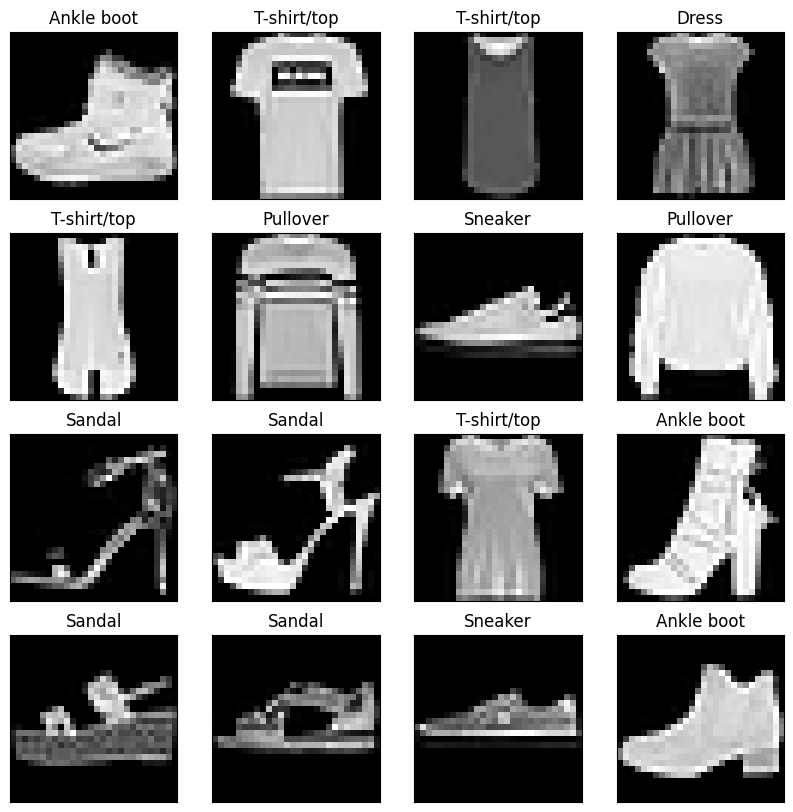

In [22]:
from keras.datasets import fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# You may explore the format of the dataset, the data type of the input images, 
# also display a few images to have a first impression of the dataset.
# Add your code here
print(X_train.shape)
print(X_test.shape)
print(X_train.dtype)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap='gray')
    plt.title(class_names[y_train[i]])


## 2. Prepare the data
Since pixel values in an image are in the same range [0, 255], we don't need to standarize or normalize the input data as what we did for the Indian Diebetes dataset. The only thing you are suppose to do for this dataset is to scale the pixel values down to the [0,1] range by simply dividing them by 255.0 (this also converts them to floats). 

In [23]:
X_train = X_train/255.0
X_test = X_test/255.0

# Lab 2: CNN --> Reshape image into 3D tensors
import numpy as np
X_train_CNN = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
print(X_train_CNN.shape)
X_test_CNN = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))


(60000, 28, 28, 1)


## 3. Build your network
Similar to the previous network you have created, you first create a `sequential` model, then add `Dense` layers one by one. The only difference here is that you need add a `Flattern` layer before the first `Dense` layer. The `Flattern` layer is to convert the 2-D image (28 x 28) into a 1-D array (784 x 1). This layer does not have any parameters, as it is just there to do simple preprocessing.

For the output layer, its node number would be the class number, the activation function for a multi-class problem is typically `softmax`.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation='relu', input_shape = (28*28,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes,activation='softmax'))
# output the model's structure
model.summary()

c:\Users\javit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\javit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# For CNN:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
model2 = Sequential()
model2.add(Input(shape=(28,28,1)))
model2.add(Conv2D(32,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128,(3,3), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(n_classes, activation='softmax'))

model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,850 (640.04 KB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
##Hongping CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout,Input

model3 = Sequential()

#
# For CNN: use a simple CNN architecture
#
model3.add(Input(shape=(28,28,1)))
model3.add(Conv2D(32, kernel_size=(3, 3),padding = 'same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dropout(0.25)) # to prevent overfitting
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5)) # to prevent overfitting
model3.add(Dense(10, activation='softmax'))
#
# CNN changes end here
#

# output the model's structure
model3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,986 (652.29 KB)

 Trainable params: 166,986 (652.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile the model
The typical loss function for a multi-class problem is the multi-class cross-entropy loss function. In Keras, there are two options. One is to use the `sparse_categorical_crossentropy` loss with the original sparse labels (i.e., for each image, there is just one actual class index, from 0 to 9 in this case). The other is to use `categorical_crossentropy` loss if the actual output is a one-hot vector (e.g., [0, 0, 1, 0, ...., 0]). In this case, you need first convert the current sparse label (i.e., class index) to one-hot vecore labels by using `keras.utils.to_categorical()` method.

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model2.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model3.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

## 5. Train and validate the model
It is important for you to use a validation set to moniter your model. Also draw the learning curve on the training and validation sets, to see how your model is learnt and how it generalises to new data, then try to adjust your model or add any regularization techniques accordingly till you are satisfied.

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7487 - loss: 0.7419 - val_accuracy: 0.8515 - val_loss: 0.4206
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8610 - loss: 0.3882 - val_accuracy: 0.8594 - val_loss: 0.3780
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8744 - loss: 0.3411 - val_accuracy: 0.8742 - val_loss: 0.3495
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8844 - loss: 0.3143 - val_accuracy: 0.8746 - val_loss: 0.3517
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8905 - loss: 0.2983 - val_accuracy: 0.8799 - val_loss: 0.3383
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8972 - loss: 0.2747 - val_accuracy: 0.8850 - val_loss: 0.3165
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9019 - loss: 0.2611 - val_accuracy: 0.8874 - val_loss: 0.3132
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.2518 - val_accuracy: 0.

Text(0.5, 0, 'epoch')

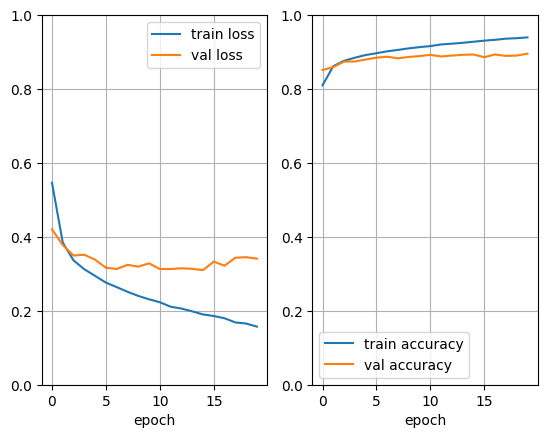

In [28]:
history = model.fit(X_train, y_train, epochs=20,
        batch_size=128, validation_split=0.2)
# history2 = model2.fit(X_train_CNN, y_train, epochs=20,
#         batch_size=128, validation_split=0.2)
# history3 = model3.fit(X_train_CNN, y_train, epochs=15,  
#         batch_size=64, validation_split=0.2)

import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
#plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
#plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

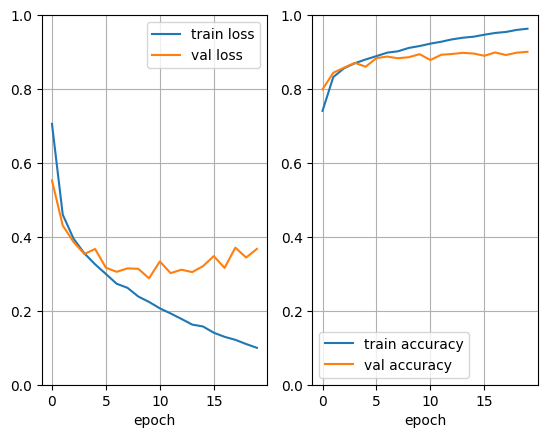

In [ ]:
history2 = model2.fit(X_train_CNN, y_train, epochs=20,
        batch_size=128, validation_split=0.2)
# history3 = model3.fit(X_train_CNN, y_train, epochs=15,  
#         batch_size=64, validation_split=0.2)

import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
#plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='train accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
#plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6598 - loss: 0.9588 - val_accuracy: 0.8602 - val_loss: 0.3862
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8280 - loss: 0.4758 - val_accuracy: 0.8789 - val_loss: 0.3279
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8533 - loss: 0.4148 - val_accuracy: 0.8892 - val_loss: 0.3025
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8655 - loss: 0.3749 - val_accuracy: 0.8921 - val_loss: 0.2892
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8756 - loss: 0.3441 - val_accuracy: 0.9008 - val_loss: 0.2651
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8844 - loss: 0.3269 - val_accuracy: 0.9077 - val_loss: 0.2505
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8888 - loss: 0.3066 - val_accuracy: 0.9057 - val_loss: 0.2517
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8927 - loss: 0.2867 - val_accura

Text(0.5, 0, 'epoch')

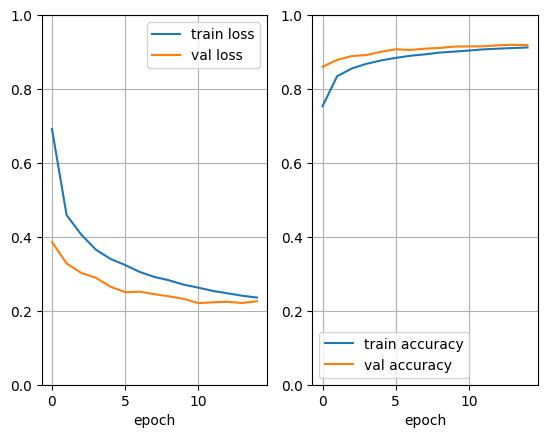

In [34]:
history3 = model3.fit(X_train_CNN, y_train, epochs=15,  
        batch_size=64, validation_split=0.2)

import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
#plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history3.history['accuracy'], label='train accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
#plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

## 6. Evaluate the model
First evaluate your model on the test set to report the accuracy on the test set. Then You use the `model`'s `predict()` method to make predictions on new instances. Display a few images and compare their predicting classes with their actual classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8853 - loss: 0.3835
Test accuracy: 0.8885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


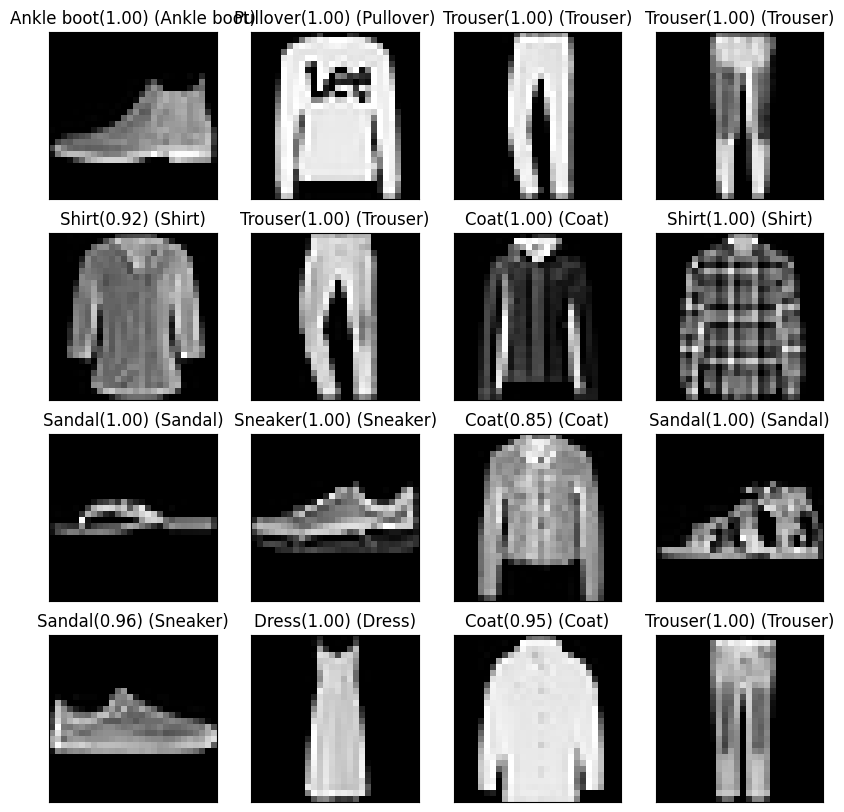

In [29]:
# Add your code here
_,test_accu = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: %.4f' % test_accu)

y_predict = model.predict(X_test[:16])
print(y_predict[:4].round(3))

import numpy as np
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i],cmap='gray')
    predict_class = np.argmax(y_predict[i])
    plt.title("%s(%.2f) (%s)" % (class_names[predict_class], np.max(y_predict[i]),class_names[y_test[i]]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8962 - loss: 0.4048
Test accuracy: 0.8998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


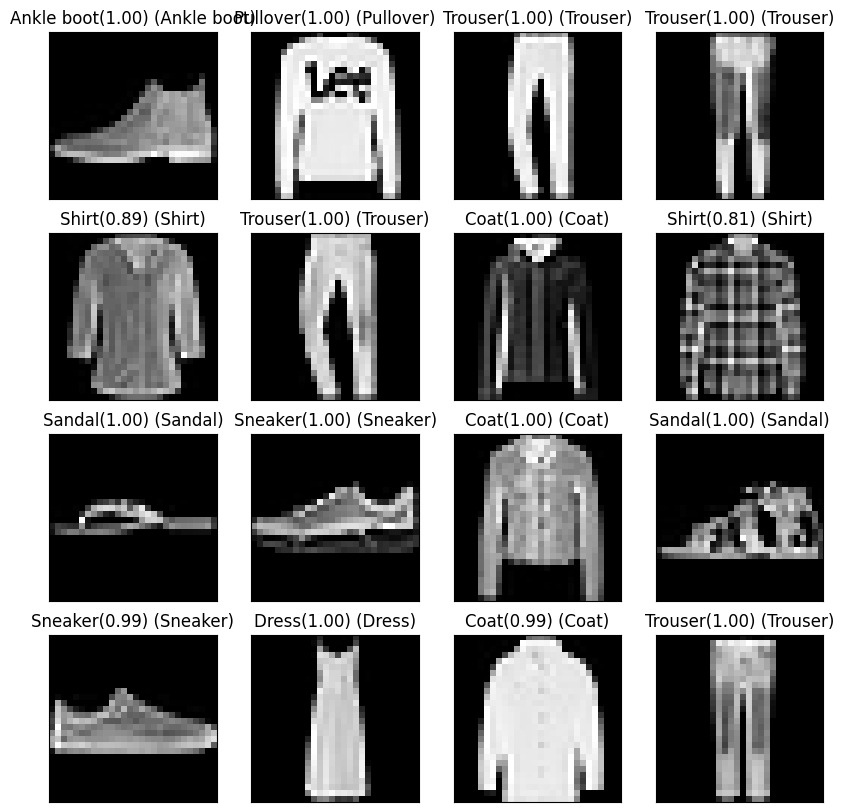

In [35]:
_,test_accu = model2.evaluate(X_test_CNN, y_test, verbose=1)
print('Test accuracy: %.4f' % test_accu)

y_predict = model2.predict(X_test_CNN[:16])
print(y_predict[:4].round(3))

import numpy as np
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test_CNN[i].squeeze(),cmap='gray') # For CNN, add squeeze() to convert (32,32,1) to (32,32)
    predict_class = np.argmax(y_predict[i])
    plt.title("%s(%.2f) (%s)" % (class_names[predict_class], np.max(y_predict[i]),class_names[y_test[i]]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9151 - loss: 0.2453
Test accuracy: 0.9144
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


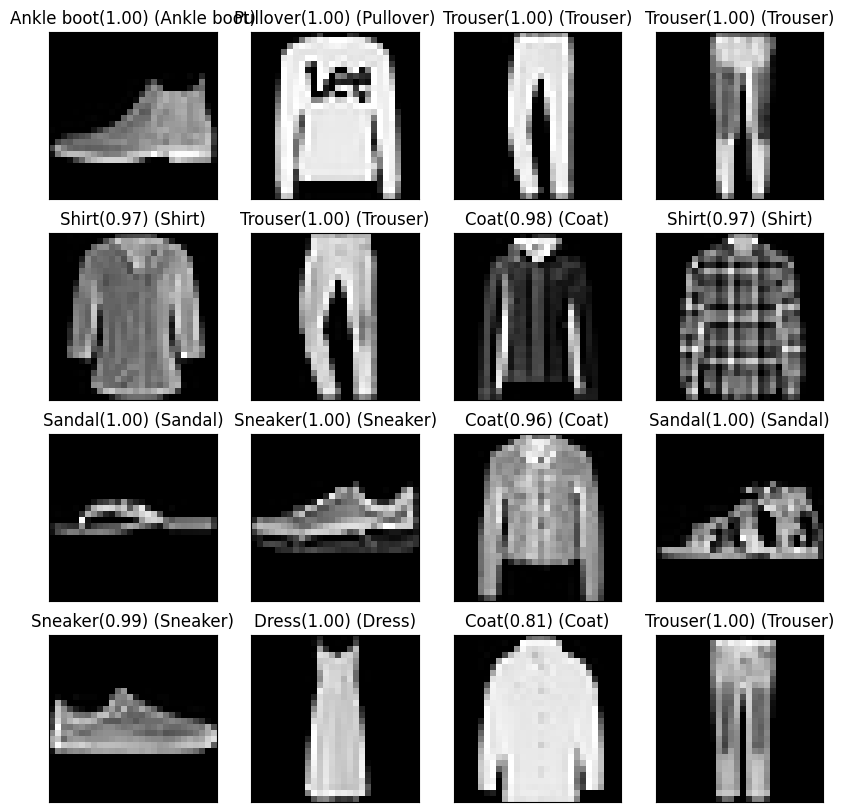

In [36]:
_,test_accu = model3.evaluate(X_test_CNN, y_test, verbose=1)
print('Test accuracy: %.4f' % test_accu)

y_predict = model3.predict(X_test_CNN[:16])
print(y_predict[:4].round(3))

import numpy as np
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test_CNN[i].squeeze(),cmap='gray') # For CNN, add squeeze() to convert (32,32,1) to (32,32)
    predict_class = np.argmax(y_predict[i])
    plt.title("%s(%.2f) (%s)" % (class_names[predict_class], np.max(y_predict[i]),class_names[y_test[i]]))